<a href="https://colab.research.google.com/github/NataAntro/QAappi/blob/main/Q%26App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1>Приложение отвечает на вопросы по контексту введённого текста.</h1>
</div>

<div style="position: absolute; bottom: 0; right: 0;">
  <p>Задание по дисциплине программная инженерия магистратуры "Инженерия машинного обучения".<br>
  Выполнила студентка Антропова Н.Г.</p>
</div>


#Первоначальная установка и импорт зависимостей:

In [ ]:
!nvidia-smi

Sun Jan 15 00:23:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install protobuf~=3.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.12.2
    Uninstalling protobuf-3.12.2:
      Successfully uninstalled protobuf-3.12.2


# Создание веб-приложения

>В основе приложения [математичская модель, отвечающая на вопрос по контексту](https://huggingface.co/AndrewChar/model-QA-5-epoch-RU)

Установка и импорт зависимостей:

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "AndrewChar/model-QA-5-epoch-RU"

# Получение предсказаний
# pipeline вопрос-ответ
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name) # nlp - переменная для хранения созданного конвейера
QA_input = {
    'question': 'Что такое API?',
    'context': 'API — описание способов взаимодействия одной компьютерной программы с другими.'
}
res = nlp(QA_input) # res - переменная для хранения результата ответа

# Загрузка модели и токенайзера
model = AutoModelForQuestionAnswering.from_pretrained(model_name, from_tf=True)


Some layers from the model checkpoint at AndrewChar/model-QA-5-epoch-RU were not used when initializing TFDistilBertForQuestionAnswering: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForQuestionAnswering were not initialized from the model checkpoint at AndrewChar/model-QA-5-epoch-RU and are newly initialized: ['dropout_119']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All TF 2.0 model weights were used when initializing DistilBertFo

> **Тест 1.0**


In [ ]:
#Текст для анализа его контекста
wikiText = """
API — описание способов взаимодействия одной компьютерной программы с другими.
"""

In [ ]:
#Определение ввода вопроса
questionSet = {
                'question': 'Что такое API?',
                'context': wikiText
                
                }

In [ ]:
#Вызов модели
res = nlp(questionSet)

Результат работы теста 1.0:



In [ ]:
res.get('answer')

'описание способов взаимодействия одной компьютерной программы'

> **Тест 1.1**



In [ ]:
#Текст для анализа его контекста
wikiText = """
АРХИТЕКТУРА ПАЙПЛАЙН
Архитектура пайплайн (от английского pipeline - трубопровод) берет свое начало из операционной системы Unix. Linux является одним из современных вариантов Unix и использует те же принципы. При проектировании Unix было принято решение разрабатывать простые программы, каждая из которых решает только одну задачи, но делает это эффективно. Чтобы программы можно было использовать для решения сложных задач, был создан механизм комбинации программ с друг с другом, который в Unix назвали pipe (труба).
С помощью pipe выходные данные от одной программы передаются на вход другой. Таким образом можно комбинировать несколько программ, чтобы реализовывать сложные задачи обработки данных.
В архитектуре пайплайн используются компоненты двух типов: фильтры (производят обработку данных), и pipe или трубы (передают данные). Передача данных, как правило, выполняется однонаправленно: от одного фильтра к другому.
Архитектура пайплайн часто используется в приложениях анализа данных и машинного обучения. Например, первый фильтр может готовить данные для анализа, второй запускает модель машинного обучения для анализа данных, а третий — преобразует выходные данные из модели машинного обучения к понятному пользователю виду. Библиотека Hugging Face, которую мы рассматривали ранее, применяет именно этот архитектурный шаблон.
Другое популярное название архитектуры пайплайна: "конвейерная архитектура". В пайплайне производится несколько последовательных операций по обработке данных. Это напоминает производство промышленной продукции на конвейере, где операции также выполняются последовательно одна за другой.
"""

In [ ]:
#Определение ввода вопроса
questionSet = {
                'question': 'Как выполняется передача данных в архитектуре Пайплайн?',
                'context': wikiText
                
                }

In [ ]:
#Вызов модели
res = nlp(questionSet)

Результат работы теста 1.1:

In [ ]:
res.get('answer')

'от одного фильтра к другому'

#Исполнение кода с помощью библиотеки Anvil

In [ ]:
!pip install anvil


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect('6MDBM4GWRL2XK5K7AVX2MS2B-XP3NWJNISTYHOC5Q')

Настройка вызываемой функции:

In [ ]:
# Определяем декоратор
@anvil.server.callable
# Определяем функцию для запуска при нажатии кнопки
def answer_questions(question_text,context_text):
    # Преобразуем входные данные в словарь
    questionSet = {
                'question': question_text,
                'context': context_text 
                }
    
    # Запускаем анализ
    results = nlp(questionSet)

    # Возвращаем результат
    return results.get('answer')

> Результат работы теста 1.0:



In [ ]:
answer_questions('Что такое API?',wikiText)


'описание способов взаимодействия одной компьютерной программы'

> Результат работы теста 1.1:



In [ ]:
answer_questions('Как с английского переводится pipeline?',wikiText)

'pipeline - трубопровод'

> Результат работы теста 1.1:
Формулировка вопроса близка к формулироке заданного модели текста, модель дала верный ответ.



In [ ]:
answer_questions('Какое ещё название есть у архитектуры пайплайна?',wikiText)

'"конвейерная архитектура'

> Результат работы теста 1.1:
Аналогичный вопрос, но с синонимичной формулировкой, отличной от заданного модели текста, модель дала неверный ответ.



In [ ]:
answer_questions('Как по-другому называют архитектуру пайплайна?',wikiText)

'фильтры'

# Визуализация с помощью библиотеки Streamlit и утилиты Ngrok

In [ ]:
!pip install streamlit==1.9.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.16.0
    Uninstalling streamlit-1.16.0:
      Successfully uninstalled streamlit-1.16.0


In [ ]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1 --quiet


In [ ]:
from pyngrok import ngrok

>Запись кода из блокнота в исполняемый файл:

Первоначальные базовые решения:

In [ ]:
%%writefile app.py
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')
    st.write("Ответ нейросети: " + answer)

Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

st.set_page_config(page_title="My QA App", page_icon=":guardsman:", layout="wide", initial_sidebar_state="auto")


model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')

    st.markdown("<div class='main-text'>Ответ нейросети:</div>" + answer, unsafe_allow_html=True)

Overwriting app.py


Финальное решение с визуальным оформлением:

In [ ]:
%%writefile app.py
# Импорт модулей
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

# Настройки страницы
st.set_page_config(page_title="My QA App", page_icon=":guardsman:", layout="wide", initial_sidebar_state="auto")

# Имя и инициализация модели 
model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

# Текст и вопрос для анализа
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

# Предупреждение, сли вопрос не задан
if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
# Подготовка данных, анализ, стили для отображения ответа, ответ
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')
    st.markdown("""
    <style>
    .answer-box {
        border: 1px solid #ccc;
        padding: 10px;
    }
    </style>
    """, unsafe_allow_html=True)
    st.markdown("<div class='answer-box'>Ответ нейросети: {}</div>".format(answer), unsafe_allow_html=True)



Overwriting app.py


**Запуск процесса:**

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

Установка и импорт зависимостей (перед запуском):

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.366s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.505s
your url is: https://wicked-geese-try-35-247-30-168.loca.lt
^C


In [ ]:
!ngrok authtoken 2KD7IAKCUV6o6YoV1PCHQsz8MzX_4RhrKCCSB9QWJxdfzPqQZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-01-12 04:32:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  14.0MB/s    in 0.9s    

2023-01-12 04:32:38 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

Поиск процесса с именем 'streamlit':

In [ ]:
!pgrep streamlit

37335
37841
38869
39645


#Скриншоты результатов работы созданного приложения

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving СкриншотПриложения1.jpg to СкриншотПриложения1 (1).jpg
Saving СкриншотПриложения2.jpg to СкриншотПриложения2.jpg
Saving СкриншотПриложения3.png to СкриншотПриложения3.png


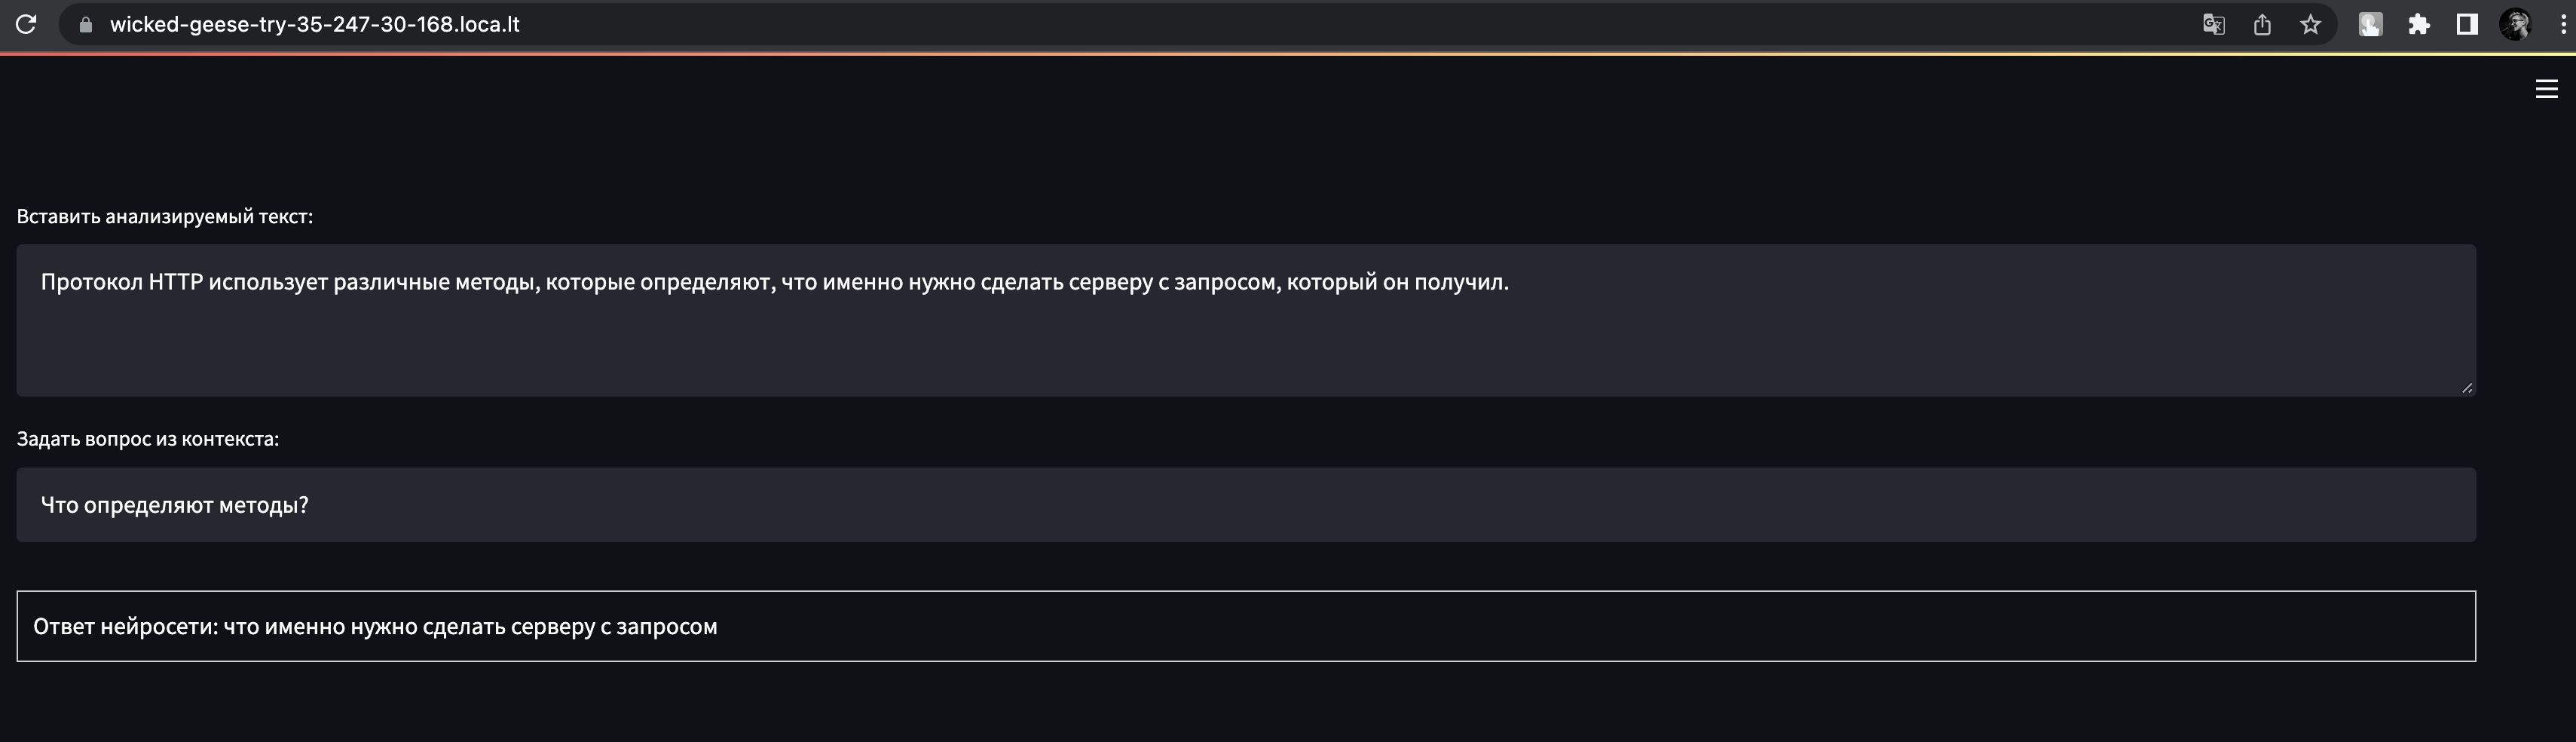

In [ ]:
Image('СкриншотПриложения3.png',
    width = 2000)

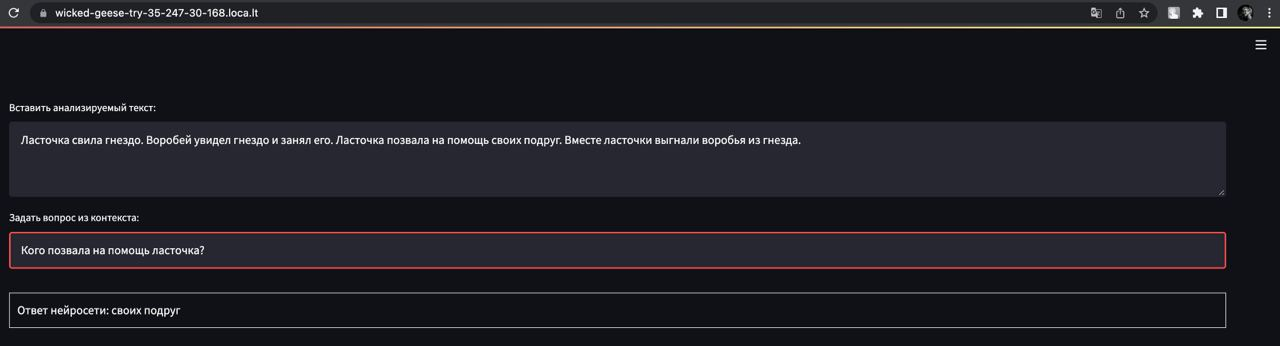

In [ ]:
Image('СкриншотПриложения1 (1).jpg',
    width = 2000)

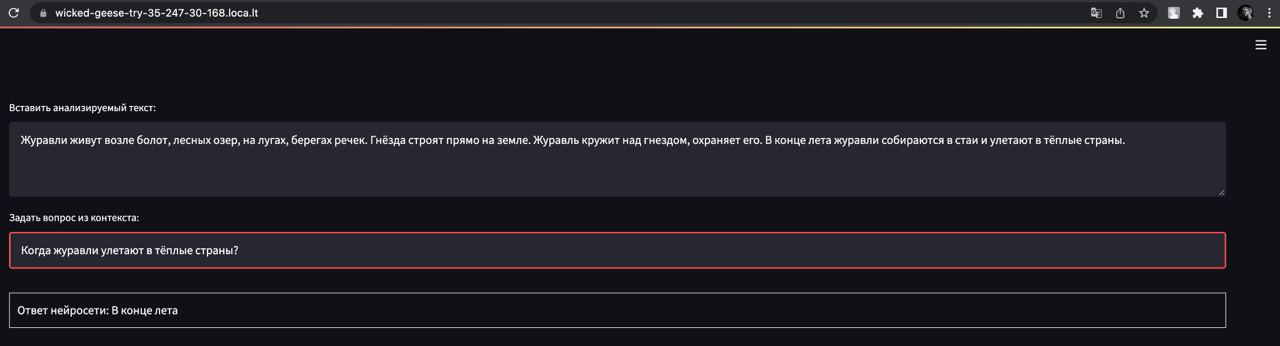

In [ ]:
Image('СкриншотПриложения2.jpg',
    width = 2000)